In [21]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from CompressTree import CompressTree
from numpy.linalg import svd

def TreeDraw(root):
    image = np.ones(root.matrix.shape)*255

    Q = deque()
    Q.append(root)
    while Q:
        v = Q.pop()
        if v.leaf:
            r = len(v.s)
            image[v.row_min:v.row_max, v.col_min:v.col_min+r] = 60*np.ones((v.row_max - v.row_min, r))#np.zeros((v.row_max - v.row_min, min(r,v.col_max - v.col_min )))
            image[v.row_min:v.row_min + r, v.col_min:v.col_max] =60*np.ones((r , v.col_max - v.col_min)) #np.zeros((min(r,v.row_max - v.row_min) , v.col_max - v.col_min))
            image[v.row_min, v.col_min:v.col_max] = np.zeros((1,v.col_max - v.col_min))
            image[v.row_max-1, v.col_min:v.col_max] = np.zeros((1,v.col_max - v.col_min))
            image[v.row_min:v.row_max,v.col_min] = np.zeros(v.row_max-v.row_min)
            image[v.row_min:v.row_max,v.col_max-1] = np.zeros(v.row_max-v.row_min)
        else:
            for i in range(2):
                for j in range(2):
                    Q.append(v.childs[i][j])
    


    plt.imshow(image,cmap = "gray", vmin=0, vmax=255)
    plt.show()

In [25]:
X = np.random.random((64,64))
P = np.random.random((64,64))
P = (P > 0.995).astype(int)
X = P * X
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
root = CompressTree(X, 0, len(X), 0, len(X[0]))
U, Sigma, V = svd(X)
Sigma
root.create_tree(1, Sigma[len(Sigma)-1])

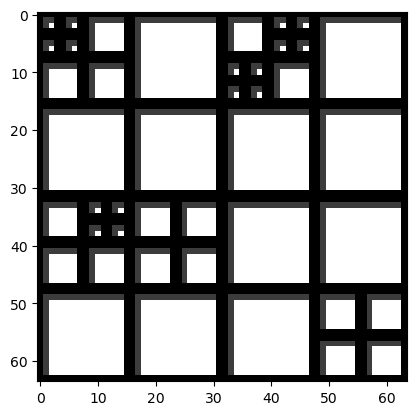

In [28]:
TreeDraw(root)